# INF552 HW-3 Zhifeng Liu 2912549136

1. Time Series Classification

In [1]:
import pandas as pd
import numpy as np

(C) Fearture Extraction

In [2]:
instance = []
data = []
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
for i in range(1,8):
    data1 = pd.read_csv("./AReM/bending1/dataset" + str(i) + ".csv", index_col=0, header=0, skiprows=4)
    data.append(data1)
    stats = []
    for each in columns:
        stats.append(data1[each].min())
        stats.append(data1[each].max())
        stats.append(data1[each].mean())
        stats.append(data1[each].median())
        stats.append(data1[each].std())
        stats.append(data1[each].quantile(q=0.25))
        stats.append(data1[each].quantile(q=0.75))
    instance.append(stats)



for i in range(1,7):
    data2 = pd.read_csv("./AReM/bending2/dataset" + str(i) + ".csv", index_col=0, header=0, skiprows=4, sep=None, engine='python')
    data.append(data2)
    stats2 = []
    for each in columns:
        stats2.append(data2[each].min())
        stats2.append(data2[each].max())
        stats2.append(data2[each].mean())
        stats2.append(data2[each].median())
        stats2.append(data2[each].std())
        stats2.append(data2[each].quantile(q=0.25))
        stats2.append(data2[each].quantile(q=0.75))
    instance.append(stats2)



In [3]:
# file_list = ['cycling', 'lying', 'sitting', 'standing', 'walking']
for file in ["cycling","lying","sitting","standing","walking"]:
    for i in range(1,16):
        data3 = pd.read_csv("./AReM/" + file + "/dataset" + str(i) + ".csv", sep=None, header=0, index_col=0, skiprows=4, engine='python', error_bad_lines=False)
        data.append(data3)
        stats3 = []
        for att in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
            stats3.append(data3[att].min())
            stats3.append(data3[att].max())
            stats3.append(data3[att].mean())
            stats3.append(data3[att].median())
            stats3.append(data3[att].std())
            stats3.append(data3[att].quantile(q=0.25))
            stats3.append(data3[att].quantile(q=0.75))
        instance.append(stats3)


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


In [4]:
print(len(instance))

88


In [5]:
col_names = []
for i in range(1, 7):
    col_names.append('min' + str(i))
    col_names.append('max' + str(i))
    col_names.append('mean' + str(i))
    col_names.append('median' + str(i))
    col_names.append('std' + str(i))
    col_names.append('1st quart' + str(i))
    col_names.append('3st quart' + str(i))
extr_feature = pd.DataFrame(instance, columns = col_names, index = np.arange(1, 89))
print(extr_feature)

     min1   max1      mean1  median1      std1  1st quart1  3st quart1  min2  \
1   37.25  45.00  40.624792   40.500  1.476967     39.2500     42.0000   0.0   
2   38.00  45.67  42.812812   42.500  1.435550     42.0000     43.6700   0.0   
3   35.00  47.40  43.954500   44.330  1.558835     43.0000     45.0000   0.0   
4   33.00  47.75  42.179813   43.500  3.670666     39.1500     45.0000   0.0   
5   33.00  45.75  41.678063   41.750  2.243490     41.3300     42.7500   0.0   
6   37.00  48.00  43.454958   43.250  1.386098     42.5000     45.0000   0.0   
7   36.25  48.00  43.969125   44.500  1.618364     43.3100     44.6700   0.0   
8   12.75  51.00  24.562958   24.250  3.737514     23.1875     26.5000   0.0   
9    0.00  42.75  27.464604   28.000  3.583582     25.5000     30.0000   0.0   
10  21.00  50.00  32.586208   33.000  6.238143     26.1875     34.5000   0.0   
11  27.50  33.00  29.881938   30.000  1.153837     29.0000     30.2700   0.0   
12  19.00  45.50  30.938104   29.000  7.

(C)iii. Estimate the standard deviation of each of the time-domain features and build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [7]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
std_list = []
for col in col_names:
    col_std = bs.bootstrap(extr_feature[col].values, stat_func=bs_stats.std, alpha=0.1)
    std_list.append(col_std)
std_result = pd.DataFrame(std_list, index=col_names)
print(std_result)


                                                            0
min1        9.515445066931841    (8.297868176779453, 10.84...
max1        4.36932238296287    (3.4603593917854862, 5.431...
mean1       5.305297059209727    (4.755551069072683, 5.937...
median1     5.409056425357996    (4.845214289031278, 6.052...
std1        1.7620872628031636    (1.5850163883107962, 1.9...
1st quart1  6.118809087075628    (5.625392160211946, 6.687...
3st quart1  5.109642753365407    (4.412144394023828, 5.933...
min2                                        0.0    (0.0, 0.0)
max2        5.033881679163113    (4.694059169816605, 5.470...
mean2       1.5652277342086631    (1.4347302632041825, 1.7...
median2     1.4042454261781125    (1.272688679387312, 1.57...
std2        0.8790990811646837    (0.8218461818036196, 0.9...
1st quart2  0.9409936333203218    (0.8548010212708417, 1.0...
3st quart2  2.11328828065351    (1.9445878309644655, 2.343...
min3        2.9396159844182215    (2.7877993209486434, 3.1...
max3    

(C)iv. In this assignment, I select the feature of min, mean and max as the most important time-domain features.

(d) Binary Classification Using Logistic Regression
i. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packa

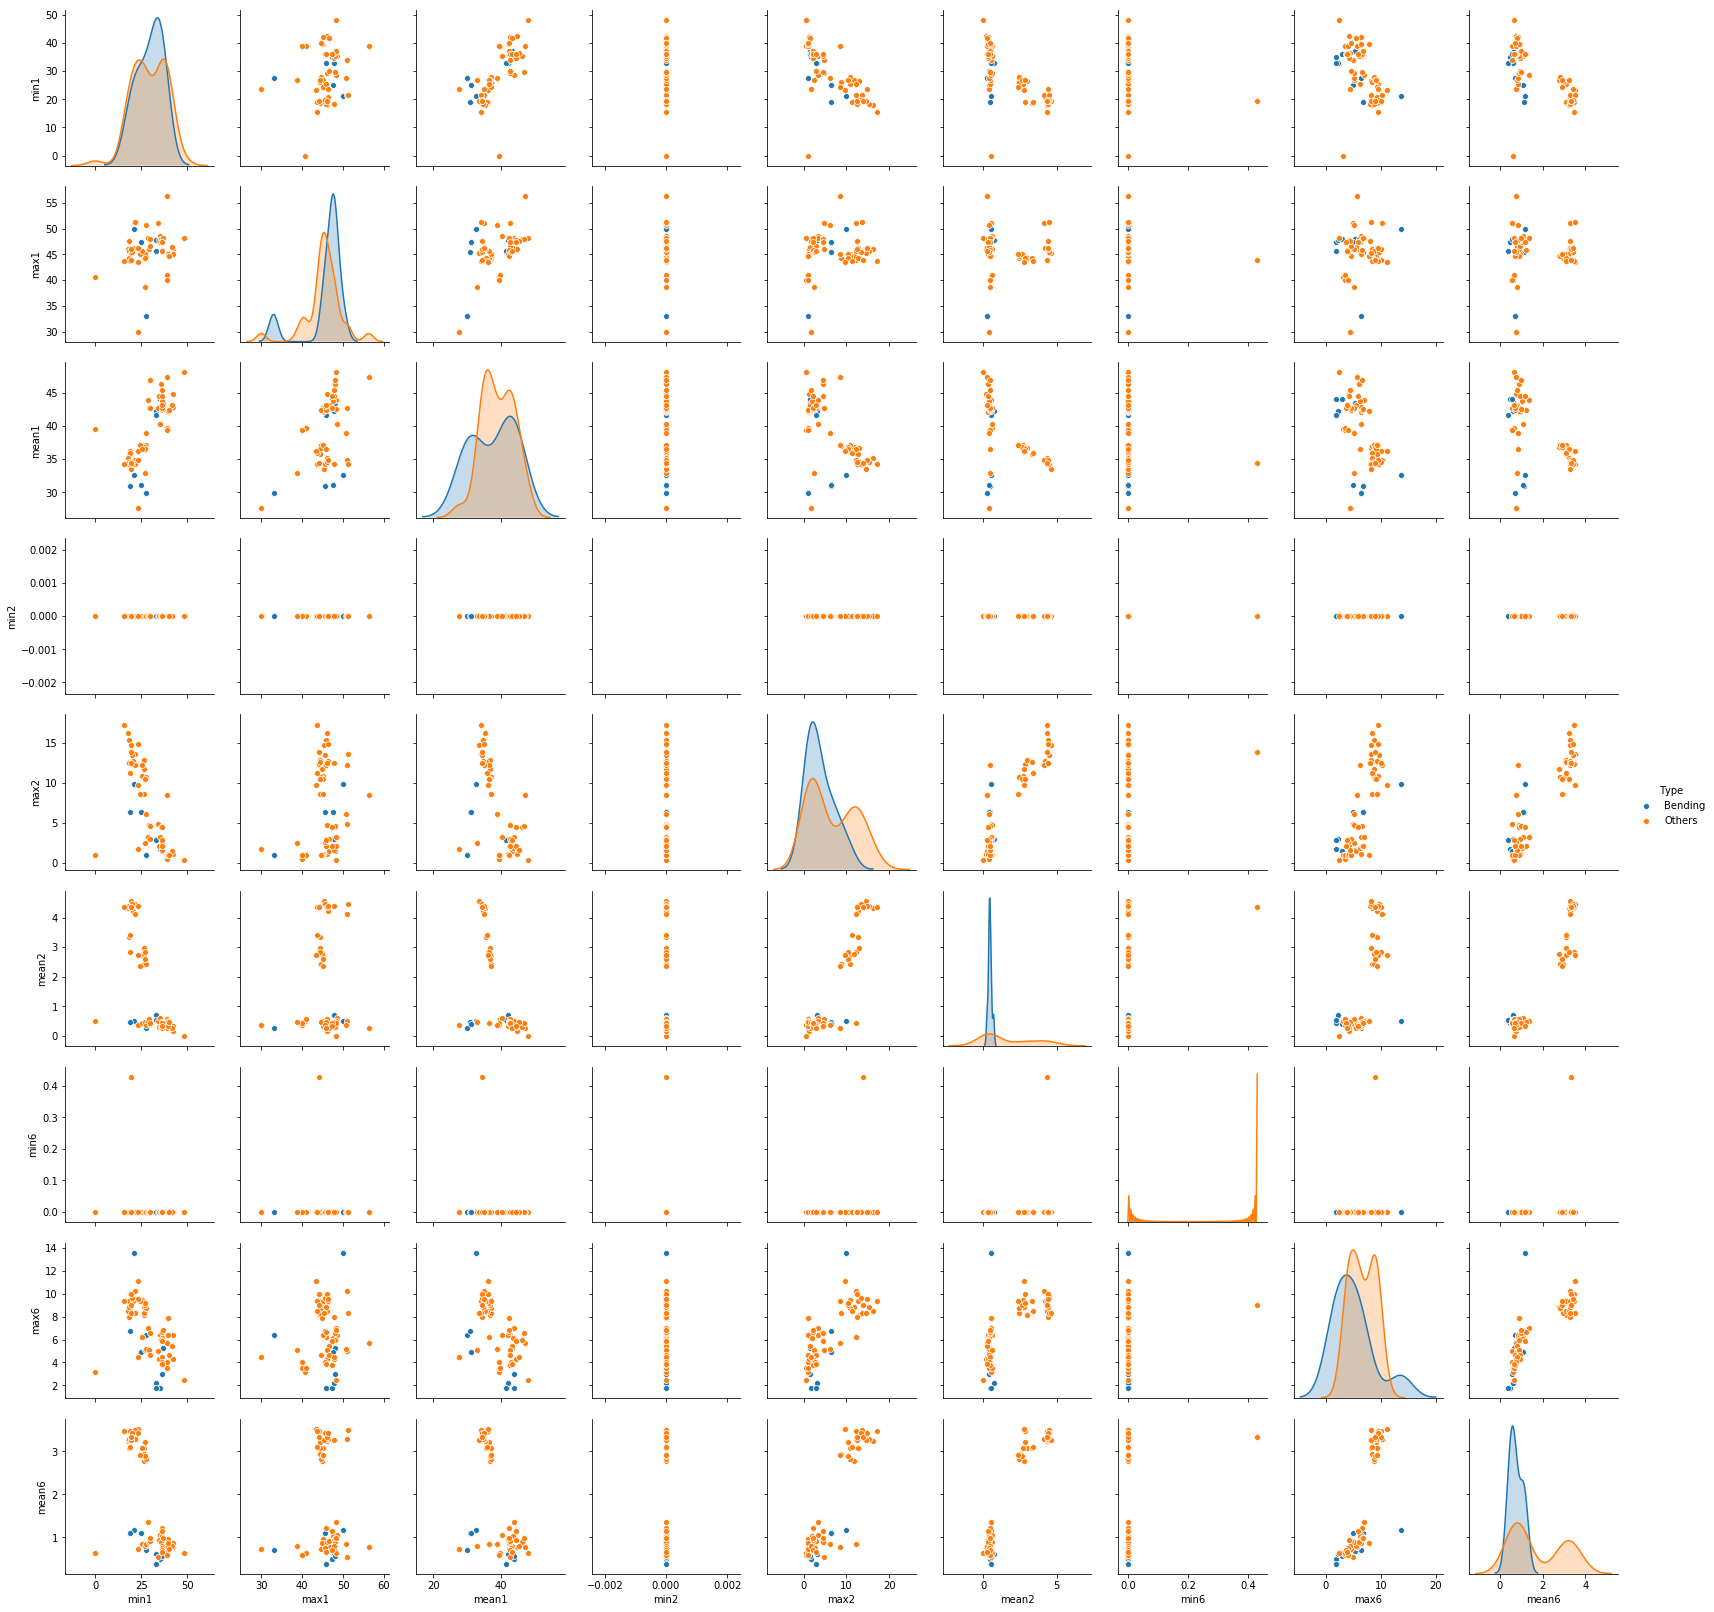

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
test_data = pd.concat([extr_feature.loc[1:2], extr_feature.loc[8:9], extr_feature.loc[14:16], extr_feature.loc[29:31], extr_feature.loc[44:46], extr_feature.loc[59:61], extr_feature.loc[74:76]])
train_data = extr_feature.drop(test_data.index)
test_data = test_data.reset_index(drop=True)
train_data = train_data.reset_index(drop=True)
# train_data = pd.DataFrame(train_data)
train_feature = train_data[['min1', 'max1', 'mean1', 'min2', 'max2', 'mean2', 'min6', 'max6', 'mean6']]
train_feature["Type"] = ['Bending' if i < 10 else 'Others' for i in range(1, 70) ]
sns.pairplot(train_feature, hue="Type", vars=['min1', 'max1', 'mean1', 'min2', 'max2', 'mean2', 'min6', 'max6', 'mean6'] )
plt.show()

In [10]:
# traindata = data[0:2]
# traindata = traindata.append(data[7:9])
# traindata = traindata.append(data[13:16])
# traindata = traindata.append(data[28:31])
# traindata = traindata.append(data[43:46])
# traindata = traindata.append(data[58:61])
# traindata = traindata.append(data[73:76])
import glob
path ='./AReM/'
folders1 = ['bending1', 'bending2']
folders2 = ['cycling', 'lying', 'sitting', 'standing', 'walking']
test_dataset_list = []
# read test data
j=0
test_df = pd.DataFrame()
file_list = []
for f in folders1+folders2:
    for file in glob.glob(path + f + '/*.csv'):
        file_list.append(file)
for f in folders1:
    df1 = pd.read_csv(path + f + '/dataset1.csv', index_col=0, header=0, skiprows=4)
    df2 = pd.read_csv(path + f + '/dataset2.csv', index_col=0, header=0, skiprows=4)
    test_dataset_list.append(df1)
    test_dataset_list.append(df2)
    j += 2

for f in folders2:
    df1 = pd.read_csv(path + f + '/dataset1.csv', index_col=0, header=0, skiprows=4)
    df2 = pd.read_csv(path + f + '/dataset2.csv', index_col=0, header=0, skiprows=4)
    df3 = pd.read_csv(path + f + '/dataset3.csv', index_col=0, header=0, skiprows=4)
    test_dataset_list.append(df1)
    test_dataset_list.append(df2)
    test_dataset_list.append(df3)
    j+=3
test_df = pd.concat(test_dataset_list)

# read training data
training_dataset_list = []
train_df = pd.DataFrame()
        
for f in folders1:
    for file in glob.glob(path + f + '/*.csv'):
        if file == path + f + "/dataset1.csv" or file == path + f + "/dataset2.csv":
            continue
        df = pd.read_csv(file, index_col=0, header=0, skiprows=4)
        training_dataset_list.append(df)
    
for f in folders2:
    for file in glob.glob(path + f + '/*.csv'):
        if file == path + f + "/dataset1.csv" or file == path + f + "/dataset2.csv" or file == path + f + "/dataset3.csv":
            continue
        df = pd.read_csv(file, sep=None, header=0, index_col=0, skiprows=4, engine='python', error_bad_lines=False)
        training_dataset_list.append(df)
    
train_df = pd.concat(training_dataset_list)

Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


(d)ii.Break each time series in your training set into two (approximately) equal length time series.Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


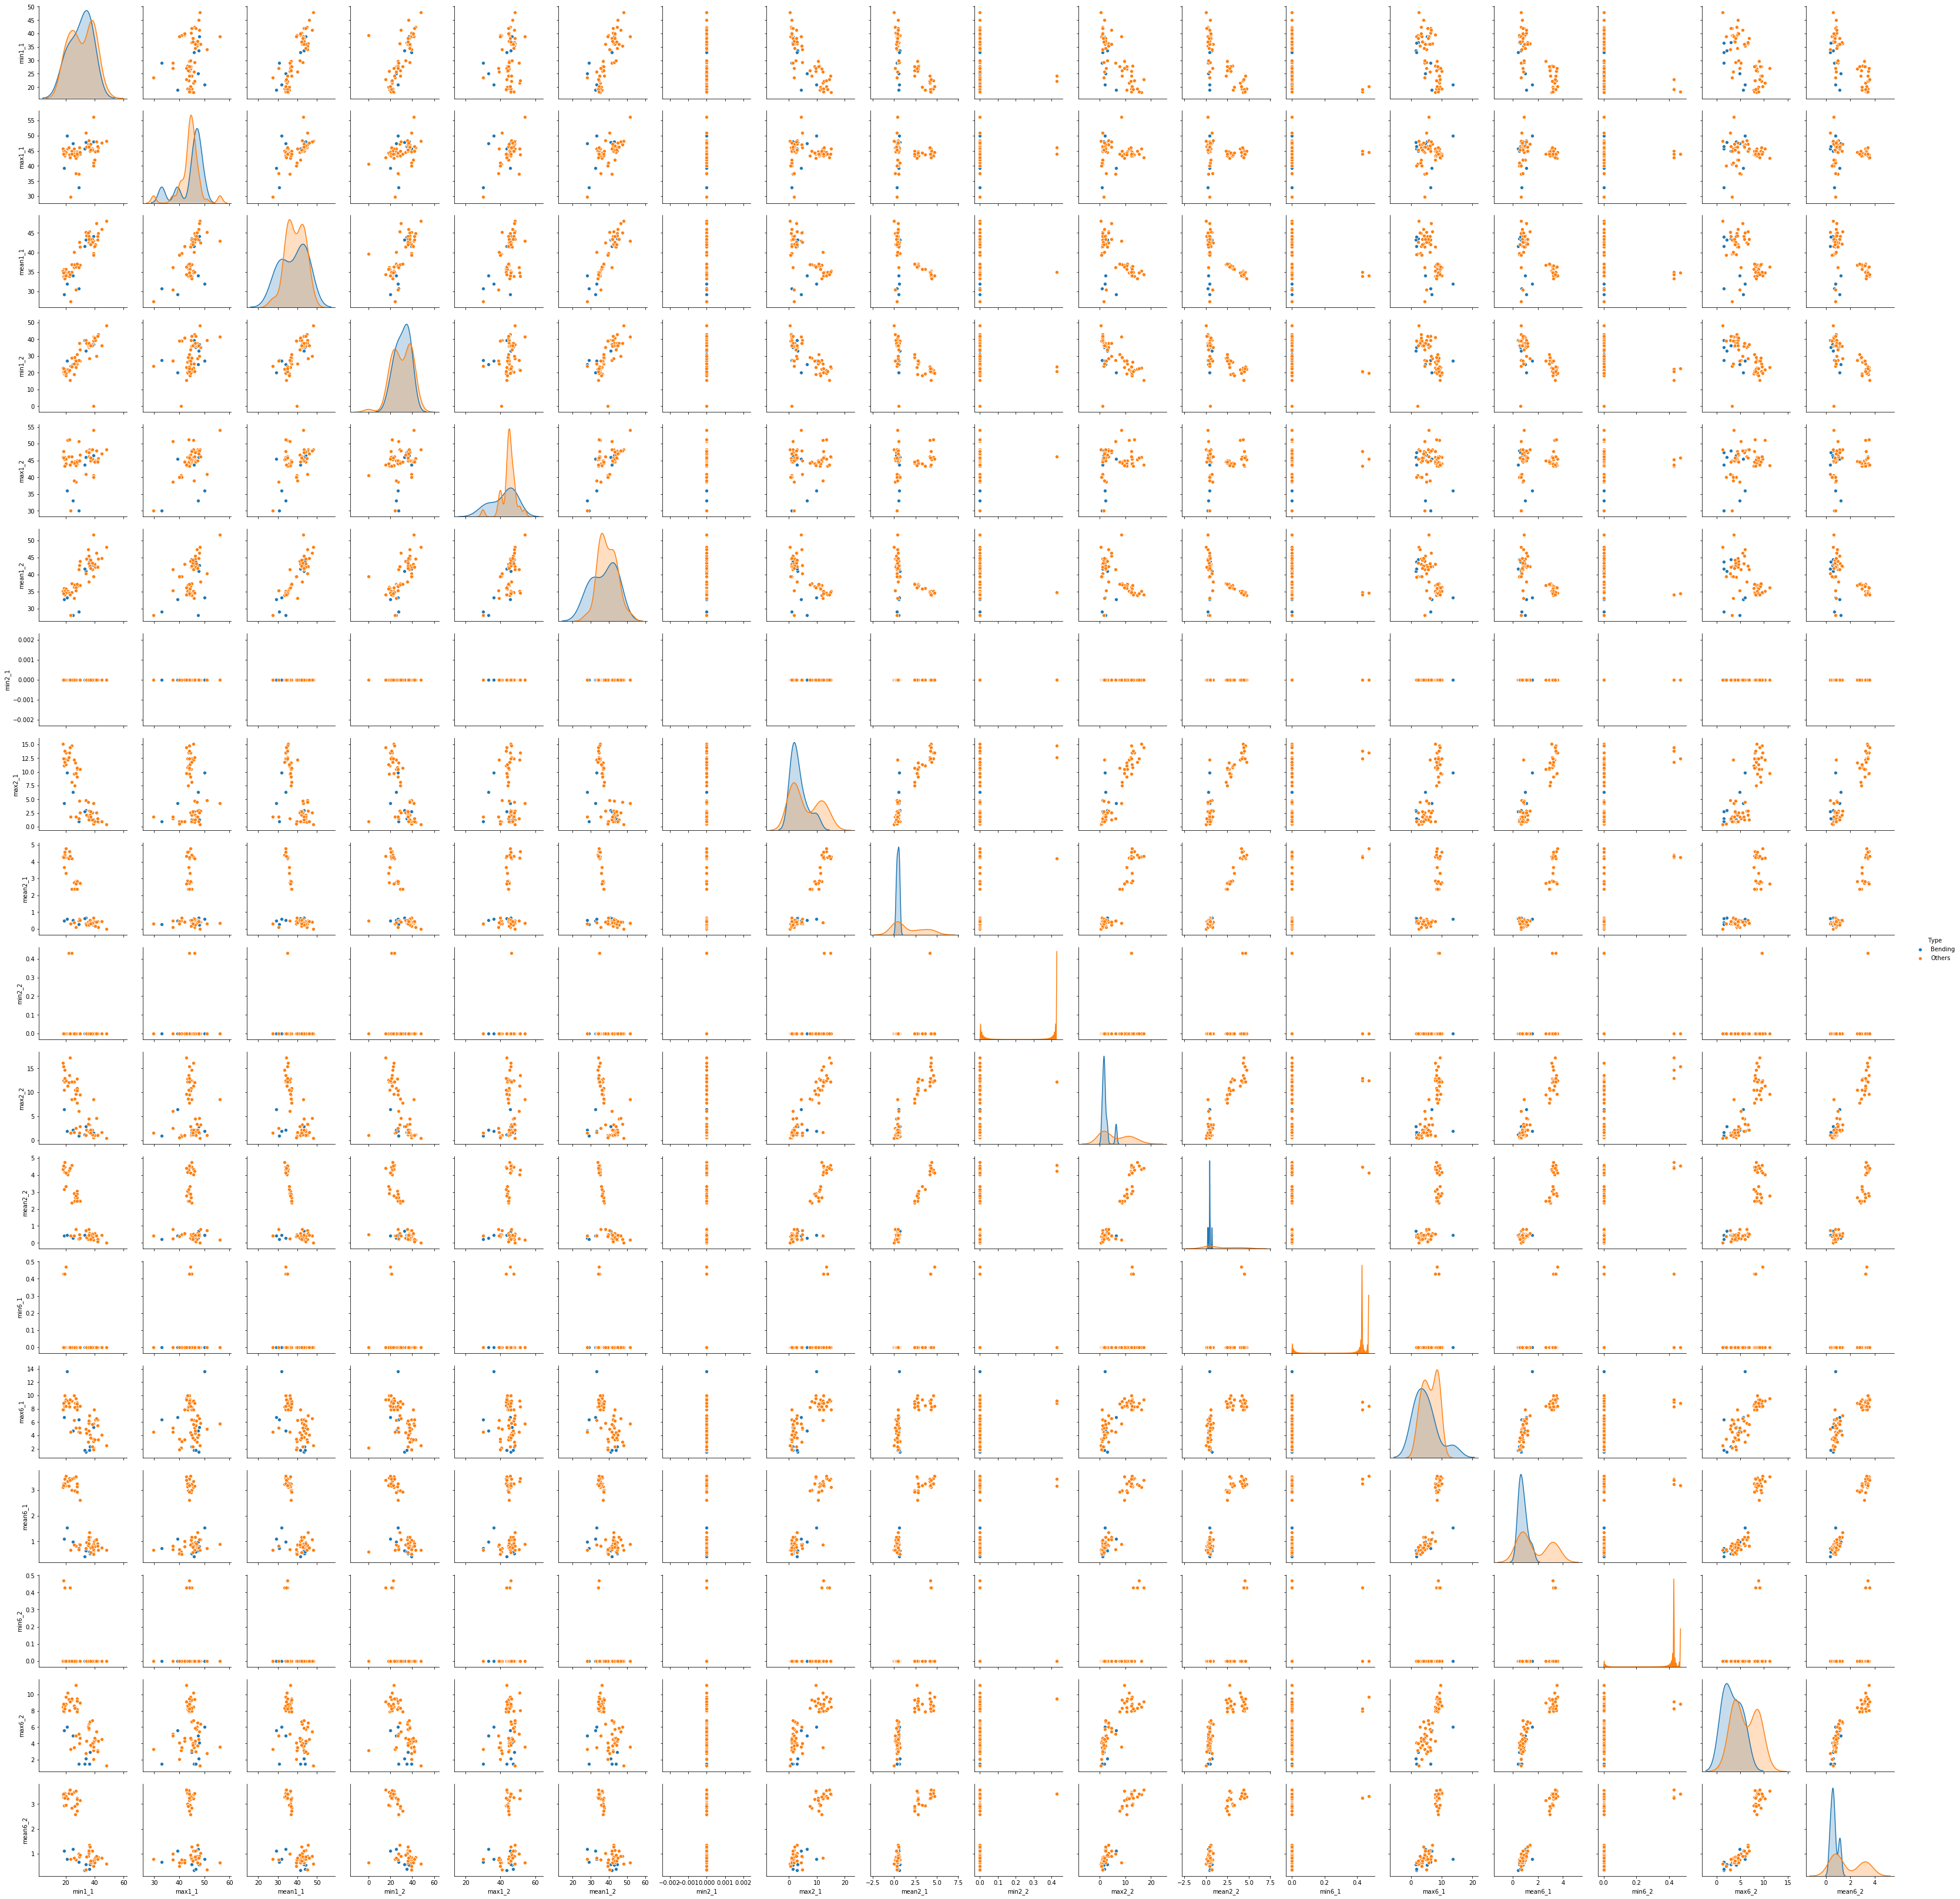

In [11]:
instance2 = []
for each in training_dataset_list:
    feature = []
    l = len(each)
    half = l//2
    first_half = each[:half]
    second_half = each[half:]
    for att in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
        feature.append(first_half[att].min())
        feature.append(first_half[att].max())
        feature.append(first_half[att].mean())
        feature.append(second_half[att].min())
        feature.append(second_half[att].max())
        feature.append(second_half[att].mean())
    instance2.append(feature)

column_name2 = ['min1_1', 'max1_1', 'mean1_1', 'min1_2', 'max1_2', 'mean1_2',
                'min2_1', 'max2_1', 'mean2_1', 'min2_2', 'max2_2', 'mean2_2',
                'min3_1', 'max3_1', 'mean3_1', 'min3_2', 'max3_2', 'mean3_2',
               'min4_1', 'max4_1', 'mean4_1', 'min4_2', 'max4_2', 'mean4_2',
               'min5_1', 'max5_1', 'mean5_1', 'min5_2', 'max5_2', 'mean5_2',
               'min6_1', 'max6_1', 'mean6_1', 'min6_2', 'max6_2', 'mean6_2']
chart = pd.DataFrame(instance2, columns =column_name2)
chart["Type"] = ['Bending' if i < 10 else 'Others' for i in range(1, 70) ]
sns.pairplot(chart, hue="Type", vars= ['min1_1', 'max1_1', 'mean1_1', 'min1_2', 'max1_2', 'mean1_2',
                'min2_1', 'max2_1', 'mean2_1', 'min2_2', 'max2_2', 'mean2_2', 'min6_1', 'max6_1', 'mean6_1', 'min6_2', 'max6_2', 'mean6_2'])
plt.show()

(d)iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length 

In [12]:
import os
data_dict = 'AReM/'
prefix = 'dataset'
filetype = '.csv'
classes = ['walking', 'standing', 'sitting', 'lying', 'cycling', 'bending1', 'bending2']
def load_data(num_parts):
    train_dataset = list()
    test_dataset = list()
    for label in range(len(classes)):    
        class_path = data_dict + classes[label] + '/'
        path, dirs, files = next(os.walk(class_path))
        file_count = len(files)
        classData_train = list()
        classData_test = list()
        for fileIndex in range(1, file_count+1):
            csvname = class_path + prefix + str(fileIndex) + filetype
            df = pd.read_csv(csvname, sep=None, header=0, index_col=0, skiprows=4, engine='python', error_bad_lines=False)
            num_singlepart = int(df.shape[0]/num_parts)
            for i in range(0, num_parts):
                df_p = df[:num_singlepart]
                df = df.drop(df.index[:num_singlepart])
                stat_pd = df_p.describe().drop('count').transpose()
                newInstance = pd.concat([stat_pd.loc['avg_rss12'], 
                                         stat_pd.loc['var_rss12'], 
                                         stat_pd.loc['avg_rss13'], 
                                         stat_pd.loc['var_rss13'], 
                                         stat_pd.loc['avg_rss23'], 
                                         stat_pd.loc['var_rss23']], 
                                         axis=0, sort=False)
                newInstance = newInstance.to_frame().transpose()
                newInstance.columns = ['mean1', 'std1', 'min1', '25%_1', 
                                       '50%_1', '75%_1', 'max1', 'mean2', 'std2', 'min2', '25%_2', 
                                       '50%_2', '75%_2', 'max2', 'mean3', 'std3', 'min3', '25%_3', 
                                       '50%_3', '75%_3', 'max3', 'mean4', 'std4', 'min4', '25%_4', 
                                       '50%_4', '75%_4', 'max4', 'mean5', 'std5', 'min5', '25%_5', 
                                       '50%_5', '75%_5', 'max5', 'mean6', 'std6', 'min6', '25%_6', 
                                       '50%_6', '75%_6', 'max6'] 
            #     print(newInstance)
#                 classData.append(newInstance)
                if classes[label] == 'bending1' or classes[label] == 'bending2':
                    if fileIndex == 1 or fileIndex == 2:
                        classData_test.append(newInstance)
                    else:
                        classData_train.append(newInstance)
                else:
                    if fileIndex == 1 or fileIndex == 2 or fileIndex == 3:
                        classData_test.append(newInstance)
                    else:
                        classData_train.append(newInstance)
                        
        classData_test = pd.concat(classData_test, ignore_index=True)
        classData_train = pd.concat(classData_train, ignore_index=True)
        classData_train['label'] = classes[label]
        classData_test['label'] = classes[label]
        if classes[label]=='bending1' or classes[label]=='bending2':
            classData_train['label_b'] = 1
            classData_test['label_b'] = 1    
        else:
            classData_train['label_b'] = 0
            classData_test['label_b'] = 0              
#         dataset.append(classData) 
        train_dataset.append(classData_train)
        test_dataset.append(classData_test)
    train_dataset = pd.concat(train_dataset, ignore_index=True, sort=False)
    test_dataset = pd.concat(test_dataset, ignore_index=True, sort=False)
    return train_dataset, test_dataset

(d)iii.Use logistic regression to solve the binary classification problem and determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination.

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

best_score = 0
best_l = 1
for l in range(1, 21):
    train_dataset_l, test_dataset_l = load_data(l)
    train_X = train_dataset_l.iloc[:, 0:-2]
    train_Y = train_dataset_l['label_b']
    model = LogisticRegression()     
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    scores = []
    for train_index, cv_index in cv.split(train_X, train_Y):

        X_train_k, X_cv = train_X.loc[train_index], train_X.loc[cv_index]
        y_train_k, y_cv = train_Y.loc[train_index], train_Y.loc[cv_index]

        selector = RFECV(LogisticRegression(), step = 1, cv = 5)
        selector = selector.fit(X_train_k, y_train_k)
        selected_features = [x for x in range(0, len(selector.support_)) if selector.support_[x] == True]
        result = model.fit(X_train_k[X_train_k.columns[selected_features]],y_train_k)
        score = result.score(X_cv[X_cv.columns[selected_features]],y_cv)
#         scores.append(selector.score(y_cv,result))
        if score > best_score:
            best_score = score
            best_l = l
print('Best score: ',best_score)
print('Best L: ', best_l)

Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485

Best score:  1.0
Best L:  1


(d) iv.Report the confusion matrix and show the ROC and AUC for your classifier on train data. 

In [18]:
from sklearn import metrics
train_dataset_1, test_dataset_1 = load_data(1)
train_X = train_dataset_1.iloc[:, 0:-2]
train_Y = train_dataset_1['label_b']
test_X = test_dataset_1.iloc[:, 0:-2]
test_Y = test_dataset_1['label_b']
model = LogisticRegression()
classifier = model.fit(train_X, train_Y)
train_pred = classifier.predict(train_X)
print("Confusion matrix:")
print(metrics.confusion_matrix(train_Y, train_pred))

Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


Confusion matrix:
[[60  0]
 [ 0  9]]


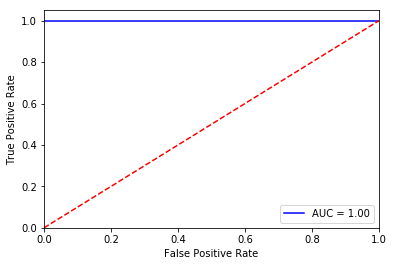

In [19]:
    fpr, tpr, threshold = metrics.roc_curve(train_Y, train_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [22]:
import statsmodels.api as sm
result_model = sm.Logit(train_Y, train_X).fit()
print(result_model.summary())

         Current function value: inf
         Iterations: 35


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

(e) Binary Classification Using L1-penalized logistic regression

In [27]:
from sklearn.linear_model import LogisticRegressionCV
best_l = 0
best_score = 0
score2 = []
for l in range(1, 21):
    train_dataset_l, test_dataset_l = load_data(l)
    train_X = train_dataset_l.iloc[:, 0:-2]
    train_Y = train_dataset_l['label_b']
#     train_X_norm = normalize(train_X)    
    test_X = test_dataset_l.iloc[:, 0:-2]
    test_Y = test_dataset_l['label_b']
#     test_X_norm = normalize(test_X)
        
    model = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=10, refit=True)
    model = model.fit(train_X, train_Y)
    score = model.score(test_X, test_Y)
    print(l, score)
    score2.append(score)
    if score > best_score:
            best_score = score
            best_l = l
print('Best score: ',best_score)
print('Best L: ', best_l)    

Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


1 1.0


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


2 1.0


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


3 1.0


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


4 0.9868421052631579


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


5 0.9894736842105263


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


6 0.9912280701754386


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


7 0.9774436090225563


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


8 0.9868421052631579


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


9 0.9824561403508771


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


10 0.9789473684210527


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


11 0.9856459330143541


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


12 0.9868421052631579


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


13 0.9757085020242915


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


14 0.9849624060150376


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


15 0.9859649122807017


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


16 0.9868421052631579


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


17 0.9845201238390093


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


18 0.97953216374269


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


19 0.9861495844875346


Skipping line 485: Expected 7 fields in line 485, saw 8
Skipping line 485: Expected 7 fields in line 485, saw 8


20 0.9842105263157894
Best score:  1.0
Best L:  1


2. ISLR 3.7.4
(a) The cubic regression model's training RSS may be lower than the linear regression model, because the cubic regression model can fit the instance tighter.
(b) The linear regression model's test RSS may be lower than cubic regression model when predicting test data, because the cubic regression model may be overfit against the training data.
(c) The cubic regression model has lower training RSS than the linear regression model, because the cubic regression model has higher flexibility that can fit training data well.
(d) It is hard to decide the test RSS in this situation. If the distribution of data is closer to linear, the linear regression's testing RSS maybe lower; otherwise, the cubic regression model's testing RSS can be lower.